In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from pycaret.time_series import *

In [2]:
root = os.path.join('data', 'upsampled')
file = 'mice_upsampled'
df = pd.read_csv(os.path.join(root, f'{file}_df.csv'))

df['date'] = pd.to_datetime(df['date'])

In [3]:
os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

global_fig_settings = {
    "renderer": "notebook",
    "width": 1000,
    "height": 600,
}

In [4]:
df['index'] = df['date']
df.drop(columns=['date'], inplace=True)
target = "total_number_of_patients"

In [6]:
eda = TSForecastingExperiment()

eda.setup(
    data=df,
    target=target,
    index="index",
    fh=60,
    fig_kwargs=global_fig_settings,
    session_id=42,
);

,Description,Value
0,session_id,42
1,Target,total_number_of_patients
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(618, 20)"
5,Transformed data shape,"(618, 20)"
6,Transformed train set shape,"(558, 20)"
7,Transformed test set shape,"(60, 20)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


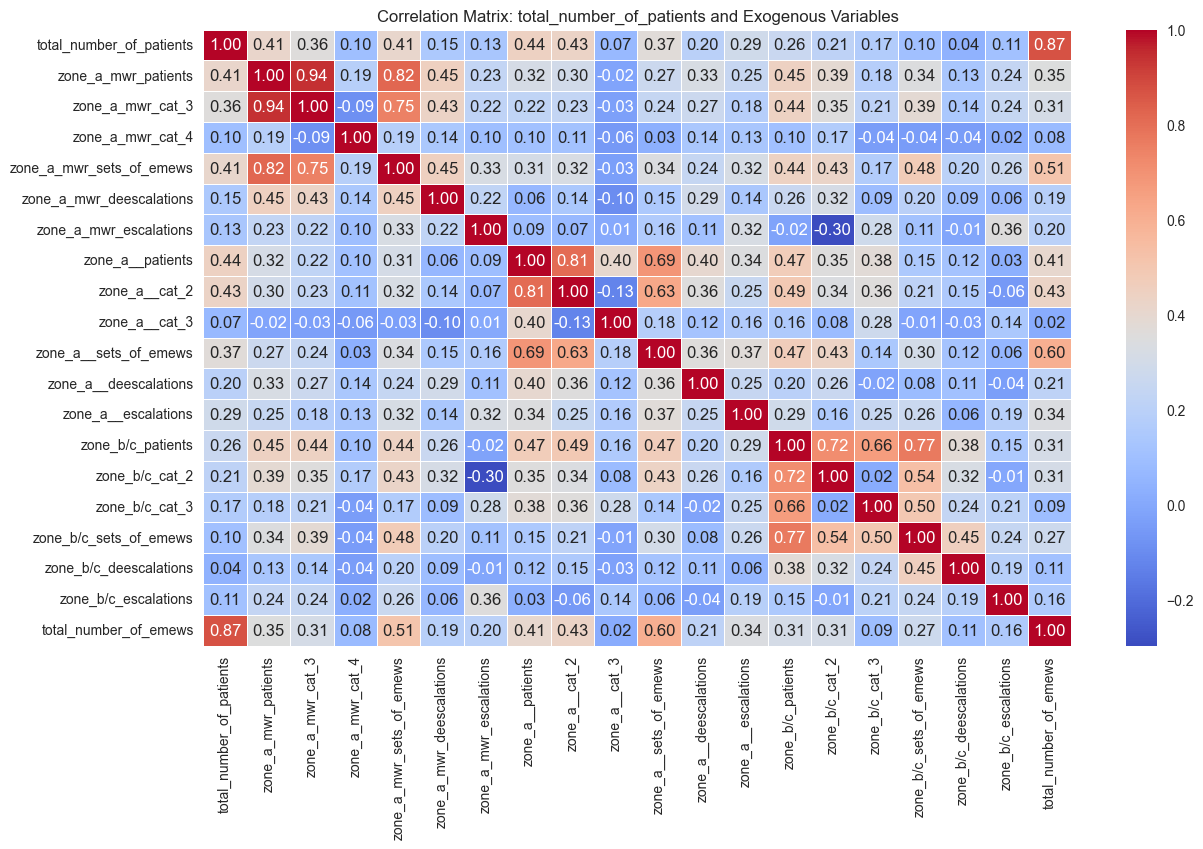

In [10]:
# access the preprocessed data (training set)
X_train_processed = eda.get_config('X_train')
y_train_processed = eda.get_config('y_train')

# the exogenous features are already included in X_train_processed.
# for correlation, we need the target series to be aligned with X_train_processed.
# y_train_processed is already aligned.

# combine processed target and exogenous features into a single DataFrame
combined_df = pd.concat([y_train_processed, X_train_processed], axis=1)

# calculate the correlation matrix
correlation_matrix = combined_df.corr()

# visualize the correlation matrix (Recommended)
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title(f'Correlation Matrix: {target} and Exogenous Variables')
plt.show()

In [31]:
fh = 60

eda = setup(df,
          target = target,
          fh = fh,
          n_jobs = -1,
          session_id = 42)

,Description,Value
0,session_id,42
1,Target,total_number_of_patients
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(618, 21)"
5,Transformed data shape,"(618, 21)"
6,Transformed train set shape,"(558, 21)"
7,Transformed test set shape,"(60, 21)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [32]:
eda.models()

,Name,Reference,Turbo
ID,,,
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
croston,Croston,sktime.forecasting.croston.Croston,True
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,pycaret.containers.models.time_series.BaseCdsD...,True
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,pycaret.containers.models.time_series.BaseCdsD...,True
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,pycaret.containers.models.time_series.BaseCdsD...,True
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,pycaret.containers.models.time_series.BaseCdsD...,True
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseaso...,pycaret.containers.models.time_series.BaseCdsD...,True
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detren...,pycaret.containers.models.time_series.BaseCdsD...,True
